# Курсовой проект по теме "Библиотеки Python для Data Science"

### Постановка задачи<a class="anchor" id="course_project_task"></a>

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения
2. Укажите свой ник на kaggle

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

### Обзор данных

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - # to do
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Подключение библиотек и скриптов**

In [344]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Пути к директориям и файлам**

In [345]:
TRAIN_DATASET_PATH = './data/course_project/train.csv'
TEST_DATASET_PATH = './data/course_project/test.csv'

**Загрузка данных**

In [346]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


**Получение информации о данных**

In [347]:
train_df.shape

(7500, 17)

In [348]:
train_df.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [349]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [350]:
train_df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [351]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [352]:
test_df.shape

(2500, 16)

In [353]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

### Обработка категориальных признаков

#### Home Ownership

In [354]:
train_df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

**Years in current job**

In [355]:
train_df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

to do: По признаку 'Years in current job' необходимо обработать пропуски

**Purpose**

In [356]:
train_df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

**Term**

In [357]:
train_df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

### Приведение типов

**Tax Liens**

In [358]:
train_df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

**Number of Open Accounts**

In [359]:
train_df['Number of Open Accounts'].value_counts()

9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30.0     11
29.0     10
32.0      6
33.0      6
31.0      6
34.0      2
37.0      2
43.0      1
35.0      1
41.0      1
38.0      1
42.0      1
Name: Number of Open Accounts, dtype: int64

to do: на основании признака 'Number of Open Accounts' можно создать новый признак

**Years of Credit History** # to do

In [360]:
train_df['Years of Credit History'].value_counts()

15.0    104
16.0     99
16.5     91
17.0     86
17.5     83
       ... 
43.2      1
4.9       1
39.5      1
42.4      1
39.8      1
Name: Years of Credit History, Length: 408, dtype: int64

**Number of Credit Problems**

In [361]:
train_df['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

**Months since last delinquent**

In [362]:
train_df['Months since last delinquent'].value_counts()

14.0     76
29.0     71
8.0      68
33.0     68
13.0     65
         ..
86.0      1
92.0      1
118.0     1
84.0      1
91.0      1
Name: Months since last delinquent, Length: 89, dtype: int64

**Bankruptcies**

In [363]:
train_df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

**Credit Score**

In [364]:
train_df['Credit Score'].value_counts()

740.0     169
747.0     168
748.0     157
745.0     152
741.0     151
         ... 
602.0       1
616.0       1
585.0       1
620.0       1
7010.0      1
Name: Credit Score, Length: 268, dtype: int64

В признаке Credit Score есть необычные высокие значения - следует проанализировать допонительно.

**Приведение типов**

In [365]:
for colname in ['Tax Liens', 'Number of Open Accounts', 'Number of Credit Problems', 'Bankruptcies']:
    train_df[colname] = train_df[colname].astype(str)
    test_df[colname] = test_df[colname].astype(str)

In [366]:
train_df.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                        object
Number of Open Accounts          object
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems        object
Months since last delinquent    float64
Bankruptcies                     object
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

### Обработка выбросов и пропусков

In [367]:
train_df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27

https://habr.com/ru/post/511132/

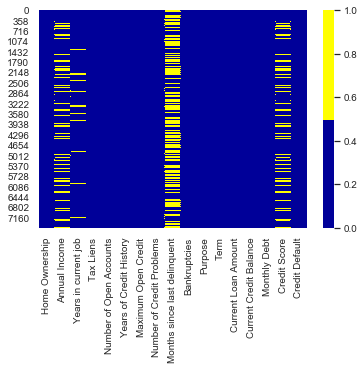

In [368]:
cols = train_df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(train_df[cols].isnull(), cmap=sns.color_palette(colours))

In [369]:
for col in train_df.columns:
    pct_missing = np.mean(train_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Home Ownership - 0.0%
Annual Income - 21.0%
Years in current job - 5.0%
Tax Liens - 0.0%
Number of Open Accounts - 0.0%
Years of Credit History - 0.0%
Maximum Open Credit - 0.0%
Number of Credit Problems - 0.0%
Months since last delinquent - 54.0%
Bankruptcies - 0.0%
Purpose - 0.0%
Term - 0.0%
Current Loan Amount - 0.0%
Current Credit Balance - 0.0%
Monthly Debt - 0.0%
Credit Score - 21.0%
Credit Default - 0.0%


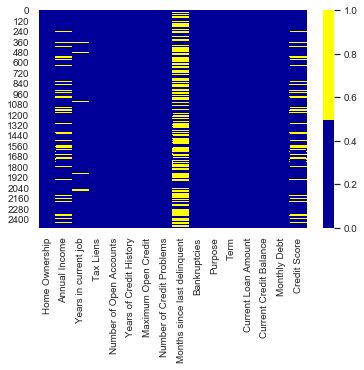

In [370]:
cols = test_df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(test_df[cols].isnull(), cmap=sns.color_palette(colours))

In [371]:
train_df.describe()

,Annual Income,Years of Credit History,Maximum Open Credit,Months since last delinquent,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7.500000e+03,3419.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,18.317467,9.451537e+05,34.692600,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,7.041946,1.602622e+07,21.688806,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,4.000000,0.000000e+00,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,13.500000,2.792295e+05,16.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,17.000000,4.781590e+05,32.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,21.800000,7.935015e+05,50.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,57.700000,1.304726e+09,118.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


**Years in current job**

In [372]:
train_df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

В признаке 'Years in current job' заполним пропуски наиболее популярным значением.

In [373]:
top = train_df['Years in current job'].describe()['top']

In [374]:
train_df.loc[train_df['Years in current job'].isna(), 'Years in current job'] = top
test_df.loc[test_df['Years in current job'].isna(), 'Years in current job'] = top

In [375]:
train_df['Years in current job'].value_counts()

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

**Credit Score**

In [376]:
train_df['Credit Score'].sort_values().unique()

array([ 585.,  586.,  588.,  589.,  590.,  591.,  593.,  594.,  597.,
        598.,  599.,  601.,  602.,  604.,  606.,  607.,  608.,  609.,
        610.,  611.,  612.,  613.,  614.,  615.,  616.,  617.,  618.,
        619.,  620.,  621.,  622.,  624.,  625.,  626.,  627.,  628.,
        629.,  630.,  631.,  632.,  633.,  634.,  635.,  636.,  637.,
        638.,  639.,  640.,  642.,  643.,  644.,  645.,  646.,  647.,
        648.,  649.,  650.,  651.,  652.,  653.,  654.,  655.,  656.,
        657.,  658.,  659.,  660.,  661.,  662.,  663.,  664.,  665.,
        666.,  667.,  668.,  669.,  670.,  671.,  672.,  673.,  674.,
        675.,  676.,  677.,  678.,  679.,  680.,  681.,  682.,  683.,
        684.,  685.,  686.,  687.,  688.,  689.,  690.,  691.,  692.,
        693.,  694.,  695.,  696.,  697.,  698.,  699.,  700.,  701.,
        702.,  703.,  704.,  705.,  706.,  707.,  708.,  709.,  710.,
        711.,  712.,  713.,  714.,  715.,  716.,  717.,  718.,  719.,
        720.,  721.,

In [377]:
print((train_df['Credit Score'] > 999).sum(), ' значений: кредитный рейтинг более 999')

400  значений: кредитный рейтинг более 999


Предполагаю, что по признаку 'Credit Score' некоторые исходные даннные содержат на конце лишний 0. Следует очистить

In [378]:
train_df.loc[(train_df['Credit Score'] > 999), 'Credit Score'] = \
            train_df['Credit Score']/10
test_df.loc[(test_df['Credit Score'] > 999), 'Credit Score'] = \
            test_df['Credit Score']/10

In [379]:
train_df['Credit Score'].sort_values().unique()

array([585., 586., 588., 589., 590., 591., 593., 594., 597., 598., 599.,
       601., 602., 604., 606., 607., 608., 609., 610., 611., 612., 613.,
       614., 615., 616., 617., 618., 619., 620., 621., 622., 623., 624.,
       625., 626., 627., 628., 629., 630., 631., 632., 633., 634., 635.,
       636., 637., 638., 639., 640., 641., 642., 643., 644., 645., 646.,
       647., 648., 649., 650., 651., 652., 653., 654., 655., 656., 657.,
       658., 659., 660., 661., 662., 663., 664., 665., 666., 667., 668.,
       669., 670., 671., 672., 673., 674., 675., 676., 677., 678., 679.,
       680., 681., 682., 683., 684., 685., 686., 687., 688., 689., 690.,
       691., 692., 693., 694., 695., 696., 697., 698., 699., 700., 701.,
       702., 703., 704., 705., 706., 707., 708., 709., 710., 711., 712.,
       713., 714., 715., 716., 717., 718., 719., 720., 721., 722., 723.,
       724., 725., 726., 727., 728., 729., 730., 731., 732., 733., 734.,
       735., 736., 737., 738., 739., 740., 741., 74

In [380]:
train_df['Credit Score'].describe()

count    5943.000000
mean      720.086993
std        27.957233
min       585.000000
25%       708.000000
50%       729.000000
75%       740.000000
max       751.000000
Name: Credit Score, dtype: float64

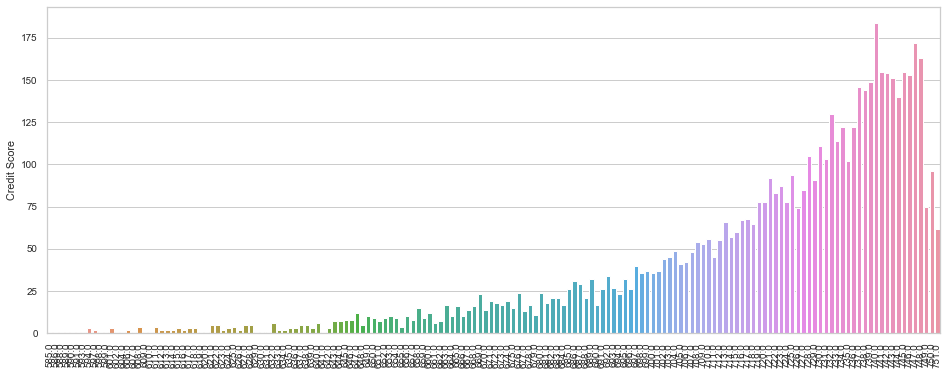

In [381]:
sns.set(style="whitegrid", font_scale=0.9)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=train_df['Credit Score'].value_counts(), 
            x=train_df['Credit Score'].value_counts().index,
           )
ax.tick_params(axis='x', rotation=90);

Задача поставлена следующим образом: "Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту.". Наличие/отсутствие данных о кредитном рейтинге - это существенный фактор для принятия решения выполнит/не выполнит клиент долговые обязательства по текущему кредиту. Поэтому заполнять пропуски медианными или какими-либо иными подобными значениями недопустимо. Целесообразно создать новую категориальную фичу на основании признака 'Credit Score'.

#### Annual Income

In [382]:
print(train_df['Annual Income'].nunique(), ' уникальных  значений Annual Income в обучающей выборке')
print(test_df['Annual Income'].nunique(), ' уникальных  значений Annual Income в тестовой выборке')

5478  уникальных  значений Annual Income в обучающей выборке
1929  уникальных  значений Annual Income в тестовой выборке


In [383]:
train_df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

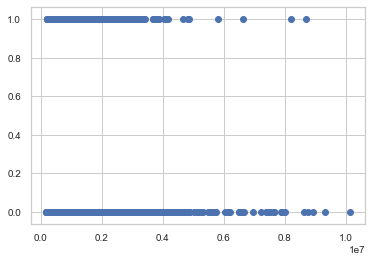

In [384]:
plt.scatter(train_df['Annual Income'], train_df['Credit Default']);

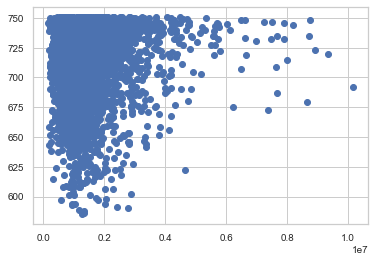

In [385]:
plt.scatter(train_df['Annual Income'], train_df['Credit Score']);

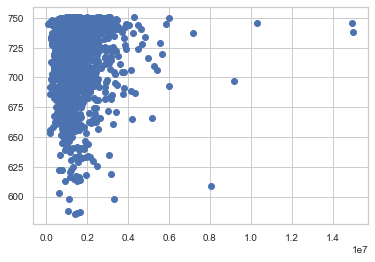

In [386]:
plt.scatter(test_df['Annual Income'], test_df['Credit Score']);

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Current Loan Amount')

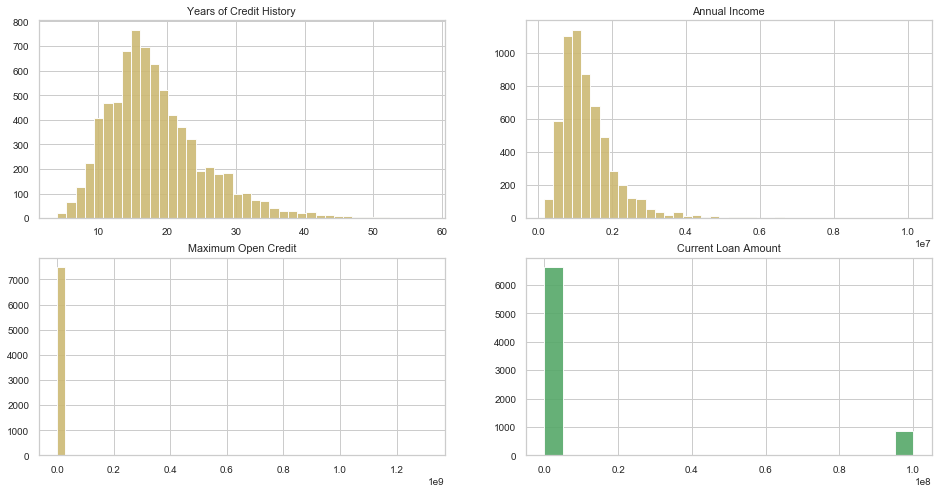

In [387]:
fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.hist(train_df['Years of Credit History'], bins=40, color='y', alpha=0.9)
ax1.set_title('Years of Credit History')

ax2.hist(train_df['Annual Income'], bins=40, color='y', alpha=0.9)
ax2.set_title('Annual Income')

ax3.hist(train_df['Maximum Open Credit'], bins=50, color='g', alpha=0.9)
ax3.set_title('Maximum Open Credit')

ax4.hist(train_df['Current Loan Amount'], bins=20, color='g', alpha=0.9)
ax4.set_title('Current Loan Amount')

#### Current Loan Amount

In [388]:
print(train_df['Current Loan Amount'].nunique(), ' уникальных  значений Current Loan Amount в обучающей выборке')
print(test_df['Current Loan Amount'].nunique(), ' уникальных  значений Current Loan Amount в тестовой выборке')

5386  уникальных  значений Current Loan Amount в обучающей выборке
2026  уникальных  значений Current Loan Amount в тестовой выборке


In [389]:
train_df['Current Loan Amount'].describe()

count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [390]:
condition_1 = (train_df['Current Loan Amount'] == 99999999)
condition_2 = (test_df['Current Loan Amount'] == 99999999)
print(condition_1.sum(), ' значений Current Loan Amount в обучающей выборке равно 99999999')
print(condition_2.sum(), ' значений Current Loan Amount в тестовой выборке равно 99999999')

870  значений Current Loan Amount в обучающей выборке равно 99999999
297  значений Current Loan Amount в тестовой выборке равно 99999999


В признаке Current Loan Amount значения равные 99999999 заменим на медианные значения.

In [391]:
train_df.loc[(train_df['Current Loan Amount'] == 99999999), 'Current Loan Amount'] = \
            train_df['Current Loan Amount'].median()
test_df.loc[(test_df['Current Loan Amount'] == 99999999), 'Current Loan Amount'] = \
            train_df['Current Loan Amount'].median()

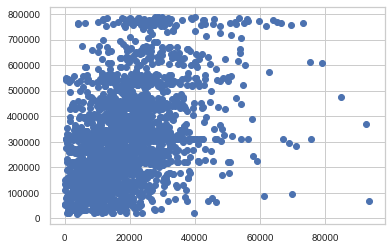

In [392]:
plt.scatter(test_df['Monthly Debt'], test_df['Current Loan Amount']);

#### Maximum Open Credit

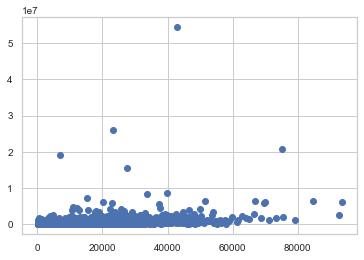

In [393]:
plt.scatter(test_df['Monthly Debt'], test_df['Maximum Open Credit']);

In [394]:
condition_1 = (train_df['Maximum Open Credit'] > 5000000)
condition_2 = (test_df['Maximum Open Credit'] > 5000000)
print(condition_1.sum(), ' значений Maximum Open Credit в обучающей выборке более 5 млн')
print(condition_2.sum(), ' значений Maximum Open Credit в тестовой выборке равно 5 млн')

52  значений Maximum Open Credit в обучающей выборке более 5 млн
17  значений Maximum Open Credit в тестовой выборке равно 5 млн


В признаке Maximum Open Credit значения более 5000000 заменим на медианные значения.

In [395]:
train_df.loc[(train_df['Maximum Open Credit'] > 5000000), 'Maximum Open Credit'] = \
            train_df['Maximum Open Credit'].median()
test_df.loc[(test_df['Maximum Open Credit'] > 5000000), 'Maximum Open Credit'] = \
            train_df['Maximum Open Credit'].median()

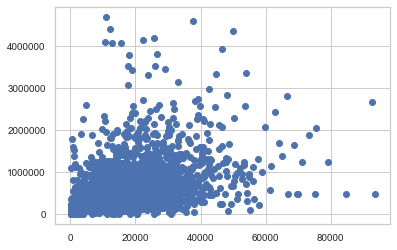

In [396]:
plt.scatter(test_df['Monthly Debt'], test_df['Maximum Open Credit']);

Text(0.5, 1.0, 'Current Loan Amount')

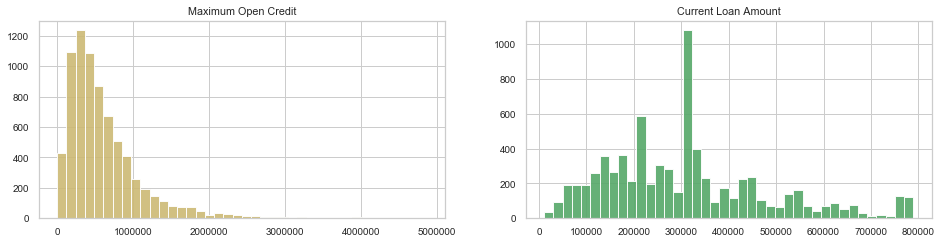

In [397]:
fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)


ax1.hist(train_df['Maximum Open Credit'], bins=40, color='y', alpha=0.9)
ax1.set_title('Maximum Open Credit')

ax2.hist(train_df['Current Loan Amount'], bins=40, color='g', alpha=0.9)
ax2.set_title('Current Loan Amount')

**Months since last delinquent**

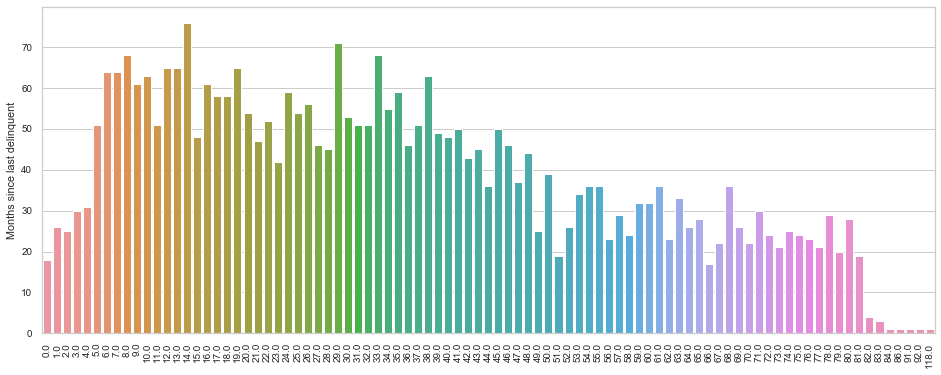

In [398]:
sns.set(style="whitegrid", font_scale=0.9)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=train_df['Months since last delinquent'].value_counts(), 
            x=train_df['Months since last delinquent'].value_counts().index,
           )
ax.tick_params(axis='x', rotation=90);

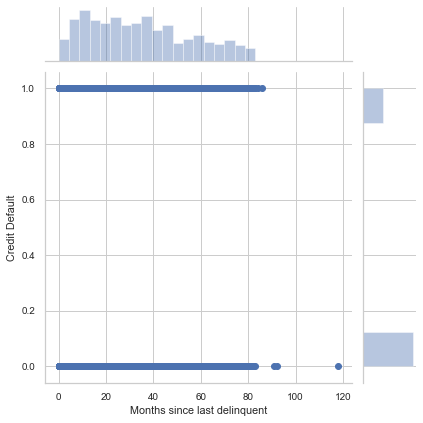

In [94]:
sns.jointplot(train_df['Months since last delinquent'], train_df['Credit Default'], kind='scatter', height=6);

### Построение новых признаков

#### Number of Open Accounts

In [18]:
print(train_df['Number of Open Accounts'].nunique(), ' уникальных  значений Number of Open Accounts в обучающей выборке')
print(test_df['Number of Open Accounts'].nunique(), ' уникальных  значений Number of Open Accounts в тестовой выборке')

39  уникальных  значений Number of Open Accounts в обучающей выборке
35  уникальных  значений Number of Open Accounts в тестовой выборке


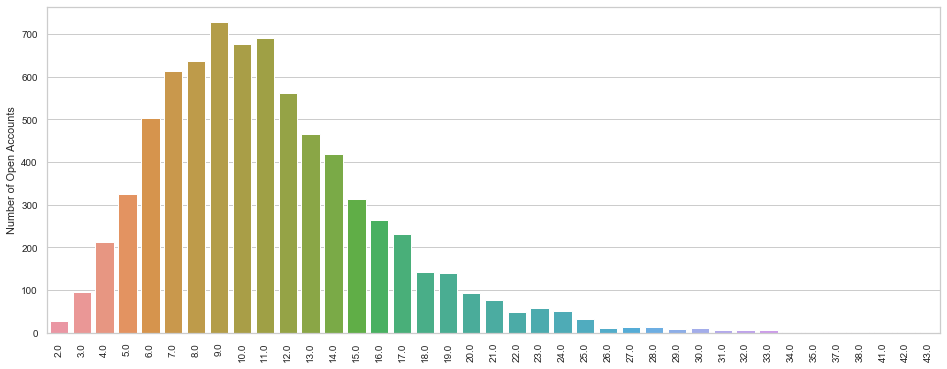

In [19]:
sns.set(style="whitegrid", font_scale=0.9)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=train_df['Number of Open Accounts'].value_counts(), 
            x=train_df['Number of Open Accounts'].value_counts().index,
           )
ax.tick_params(axis='x', rotation=90);

Number_of_OpenAccounts_Сat - категория количества открытых счетов

In [27]:
train_df.loc[train_df['Number of Open Accounts'] <= 5, 'Number_of_OpenAccounts_Сat'] = 1  
train_df.loc[(train_df['Number of Open Accounts'] > 5) & (train_df['Number of Open Accounts'] <= 8), 'Number_of_OpenAccounts_Сat'] = 2
train_df.loc[(train_df['Number of Open Accounts'] > 8) & (train_df['Number of Open Accounts'] <= 12), 'Number_of_OpenAccounts_Сat'] = 3
train_df.loc[(train_df['Number of Open Accounts'] > 12) & (train_df['Number of Open Accounts'] <= 16), 'Number_of_OpenAccounts_Сat'] = 4
train_df.loc[train_df['Number of Open Accounts'] > 16, 'Number_of_OpenAccounts_Сat'] = 5

test_df.loc[test_df['Number of Open Accounts'] <= 5, 'HouseFloor_cat'] = 1  
test_df.loc[(test_df['Number of Open Accounts'] > 5) & (test_df['Number of Open Accounts'] <= 8), 'Number_of_OpenAccounts_Сat'] = 2
test_df.loc[(test_df['Number of Open Accounts'] > 8) & (test_df['Number of Open Accounts'] <= 12), 'Number_of_OpenAccounts_Сat'] = 3
test_df.loc[(test_df['Number of Open Accounts'] > 12) & (test_df['Number of Open Accounts'] <= 16), 'Number_of_OpenAccounts_Сat'] = 4
test_df.loc[test_df['Number of Open Accounts'] > 16, 'Number of Open Accounts'] = 5

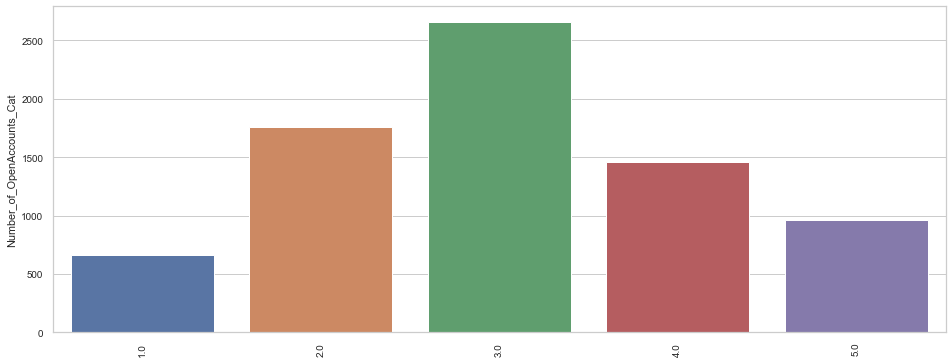

In [28]:
sns.set(style="whitegrid", font_scale=0.9)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=train_df['Number_of_OpenAccounts_Сat'].value_counts(), 
            x=train_df['Number_of_OpenAccounts_Сat'].value_counts().index,
           )
ax.tick_params(axis='x', rotation=90);

#### Credit Score